In [1]:
import keras

Using TensorFlow backend.


In [2]:
#将图像复制到训练、验证和测试目录
import os, shutil

#原始数据集解压目录的路径
original_dataset_dir = 'kaggle_original_data\\train'

#保存较小数据集的目录
base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)

#划分后的训练、验证和测试的目录
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'valiadation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

#猫的训练图像目录
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

#狗的训练图像目录
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#猫的验证图像目录
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

#狗的验证图像目录
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#猫的测试图像目录
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

#狗的测试图像目录
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#将前1000张猫的图像复制到train_cat_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#将接下来的500张猫的图像复制到validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#将接下来的500张猫的图像复制到test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#将前1000张狗的图像复制到train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#将接下来的500张狗的图像复制到validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#将接下来的500张猫的图像复制到test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

检查每个分组中分别包含多少张图像

In [3]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))

total training cat images:  1000


In [4]:
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

total training dog images:  1000


In [5]:
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))

total validation cat images:  500


In [6]:
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))

total validation dog images:  500


In [7]:
print('total test cat images: ', len(os.listdir(test_cats_dir)))

total test cat images:  500


In [8]:
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total test dog images:  500


构建网络

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [11]:
#配置模型用于训练
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

数据预处理

In [12]:
#使用ImageDataGenerator从目录中读取图像
from keras.preprocessing.image import ImageDataGenerator

#所有图像乘以1/255缩放
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,                       #目标目录
        target_size=(150,150),            # 将所有图像大小调整为150*150
        batch_size=20,               
        class_mode='binary')             # 因为使用了binary_crossentropy损失，所以用二进制标签

validation_generator = test_datagen.flow_from_directory(
        test_dir,                       
        target_size=(150,150),            
        batch_size=20,              
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
#其中一个生成器的输出
for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
#利用批量生成器拟合模型
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 52s 521ms/step - loss: 0.6899 - acc: 0.5240 - val_loss: 0.6268 - val_acc: 0.6290
Epoch 2/30
100/100 [==============================] - 52s 516ms/step - loss: 0.6514 - acc: 0.6230 - val_loss: 0.5954 - val_acc: 0.6600
Epoch 3/30
100/100 [==============================] - 52s 523ms/step - loss: 0.6056 - acc: 0.6695 - val_loss: 0.7909 - val_acc: 0.5600
Epoch 4/30
100/100 [==============================] - 51s 508ms/step - loss: 0.5696 - acc: 0.7115 - val_loss: 0.5891 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 51s 506ms/step - loss: 0.5445 - acc: 0.7280 - val_loss: 0.6340 - val_acc: 0.6870
Epoch 6/30
100/100 [==============================] - 51s 505ms/step - loss: 0.5147 - acc: 0.7435 - val_loss: 0.4345 - val_acc: 0.7080
Epoch 7/30
100/100 [==============================] - 51s 507ms/step - loss: 0.4940 - acc: 0.7535 - val_loss: 0.6297 - val_acc: 0.6770
Epoch 8/30
100/100 [==============================] - 5

In [15]:
#保存模型
model.save('cats_and_dogs_small_1.h5')

In [16]:
#绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

训练精度随时间线性增加，直到接近100%，而验证精度则停留在70%左右
验证损失在5轮后就达到最小值，然后保持不变，而训练损失一直线性下降直到接近0



使用数据增强

In [17]:
#利用ImageDataGenerator来设置数据增强
datagen = ImageDataGenerator(
        rotation_range=40,     #角度值（在0—180范围内），表示图像随机旋转的角度范围
        width_shift_range=0.2, #图像在水平或垂直方向上平移的范围（相对于总宽度或总高度的比例）
        height_shift_range=0.2,
        shear_range=0.2,       #随机错切变换的角度
        zoom_range=0.2,        #图像随机缩放的范围
        horizontal_flip=True,  #随机将一半图像水平翻转
        fill_mode='nearest')   #填充新创建像素的方法

In [21]:
#显示几个随机增强后的训练图像
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

#选择一张图像进行增强
img_path = fnames[3]

#读取图像大小并调整大小
img = image.load_img(img_path,target_size=(150,150))

#转换为(150,150,3)的numpy数组
x = image.img_to_array(img)

#将形状转换为(1,150,150,3)
x = x.reshape((1,)+x.shape)


#生成随机变换后的图像批量，循环是无限的所以要在某个时刻终止
#i=0
#for batch in datagen.flow(x,batch_size=1):
#   plt.figure(i)
#   imgplot=plt.imshow(image.array_to_img(batch[0]))
#    i+=1
#    if 1%4==0:
#       break
#plt.show()


In [22]:
from keras import models
from keras import layers
#定义一个包含dropout的新卷积神经网络(降低过拟合)
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [24]:
#利用数据增强生成器训练卷积神经网络
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)   #不能增强验证数据

train_generator = train_datagen.flow_from_directory(
        train_dir,                               #目标目录
        target_size=(150,150),                    #将所有图像大小调整为150*150
        batch_size=32,
        class_mode='binary')                    #使用二进制标签

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 95s 947ms/step - loss: 0.6915 - acc: 0.5297 - val_loss: 0.6773 - val_acc: 0.5964
Epoch 2/100
100/100 [==============================] - 91s 914ms/step - loss: 0.6764 - acc: 0.5744 - val_loss: 0.6530 - val_acc: 0.5902
Epoch 3/100
100/100 [==============================] - 92s 917ms/step - loss: 0.6636 - acc: 0.5909 - val_loss: 0.6926 - val_acc: 0.5819
Epoch 4/100
100/100 [==============================] - 93s 928ms/step - loss: 0.6512 - acc: 0.6143 - val_loss: 0.6249 - val_acc: 0.6572
Epoch 5/100
100/100 [==============================] - 90s 903ms/step - loss: 0.6319 - acc: 0.6345 - val_loss: 0.6517 - val_acc: 0.6865
Epoch 6/100
100/100 [==============================] - 93s 931ms/step - loss: 0.6104 - acc: 0.6633 - val_loss: 0.5841 - val_acc: 0.6785
Epoch 7/100
100/100 [==============================] - 91s 908ms/step - loss: 0.6009 - acc: 0.6758 -

In [25]:
#保存模型
model.save('cats_and_dogs_small_2.h5')

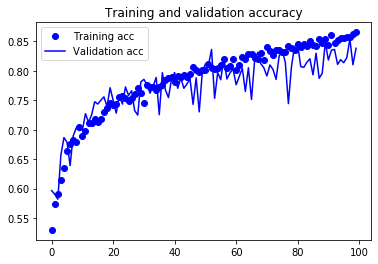

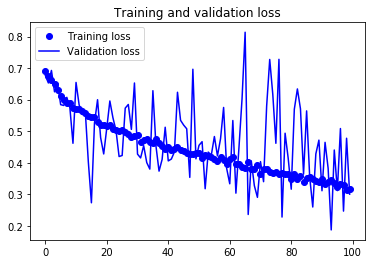

In [26]:
#绘制结果
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()